# Import required libraries

In [127]:
import nltk
import os 

Visualize Syntax Tree:

Ghost Script Download : https://www.ghostscript.com/download/gsdnld.html

In [128]:
# # Ghostscript to visualize the sentence tree
#path_to_gs = r"C:\Program Files\gs\gs9.54.0\bin"
path_to_gs = 'C:\\Program Files\\gs\\gs9.54.0\\bin'
# modifying environment variable
#os.environ['PATH']+=os.pathsep + path_to_gs

In [130]:
os.environ['PATH']

'C:\\Users\\navan\\anaconda3;C:\\Users\\navan\\anaconda3\\Library\\mingw-w64\\bin;C:\\Users\\navan\\anaconda3\\Library\\usr\\bin;C:\\Users\\navan\\anaconda3\\Library\\bin;C:\\Users\\navan\\anaconda3\\Scripts;C:\\Program Files (x86)\\Common Files\\Oracle\\Java\\javapath;C:\\WINDOWS\\system32;C:\\WINDOWS;C:\\WINDOWS\\System32\\Wbem;C:\\WINDOWS\\System32\\WindowsPowerShell\\v1.0\\;C:\\WINDOWS\\System32\\OpenSSH\\;C:\\Program Files\\Graphviz\\bin;C:\\Users\\navan\\anaconda3;C:\\Users\\navan\\anaconda3\\Library\\mingw-w64\\bin;C:\\Users\\navan\\anaconda3\\Library\\usr\\bin;C:\\Users\\navan\\anaconda3\\Library\\bin;C:\\Users\\navan\\anaconda3\\Scripts;C:\\Users\\navan\\AppData\\Local\\Microsoft\\WindowsApps;C:\\Users\\navan\\AppData\\Local\\atom\\bin;C:\\Program Files\\JetBrains\\PyCharm Community Edition 2021.1.1\\bin;;C:\\Users\\navan\\anaconda3\\lib\\site-packages\\scipy\\.libs;C:\\Program Files\\gs\\gs9.54.0\\bin;C:\\Program Files\\gs\\gs9.54.0\\bin;C:\\Program Files\\gs\\gs9.54.0\\bin'

# Chunking in Python

In [132]:
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk import RegexpParser as regex_parser

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\navan\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Example 1
#### Extracting Noun Phrases from the sentence  (chunking)

In [134]:
sent = "The little mouse ate the fresh cheese"
sent_tokens = nltk.pos_tag(word_tokenize(sent)) 
sent_tokens

[('The', 'DT'),
 ('little', 'JJ'),
 ('mouse', 'NN'),
 ('ate', 'VB'),
 ('the', 'DT'),
 ('fresh', 'JJ'),
 ('cheese', 'NN')]

In [135]:
# we are chunking Noun Phrase using the following reg.exp.
# regex:
#     the pos tags are in angular brackets, ? -> 0 or 1 occurences, * -> 0 or many occurences, + -> 1 or many occurences 
#     <DT>? means, the determinant can have 0 or 1 occurences
#     <JJ>* means, the adjective can have 0 or many occurences
#     <NN> means, the noun has to occur exactly one time at that place
#     In the regexp below:
#       <DT> can occur 0 or 1 times, followed by <JJ> Adjective 0 or multiple times followed by exactly one <NN> Noun
# "The little mouse ate the fresh cheese"

#phrase name
grammar_np = r"NP: {<DT>?<JJ>*<NN>}" # mouse / little mouse / the little mouse / the fresh hot cheese -> are valid as per this
# grammar_np = r"NP: {<NN><VB>}

In [136]:
chunk_parser = regex_parser(grammar_np)

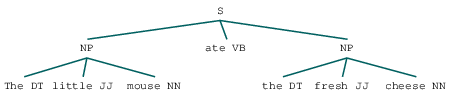

In [137]:
chunk_result = chunk_parser.parse(sent_tokens)
chunk_result

In [84]:
print(chunk_result)

(S
  (NP The/DT little/JJ mouse/NN)
  ate/VB
  (NP the/DT fresh/JJ cheese/NN))


In [138]:
sent = "He said that the little mouse ate the fresh cheese"
sent_tokens = nltk.pos_tag(word_tokenize(sent)) 
sent_tokens

[('He', 'PRP'),
 ('said', 'VBD'),
 ('that', 'IN'),
 ('the', 'DT'),
 ('little', 'JJ'),
 ('mouse', 'NN'),
 ('ate', 'VB'),
 ('the', 'DT'),
 ('fresh', 'JJ'),
 ('cheese', 'NN')]

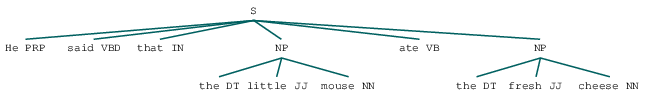

In [139]:
chunk_result = chunk_parser.parse(sent_tokens)
chunk_result

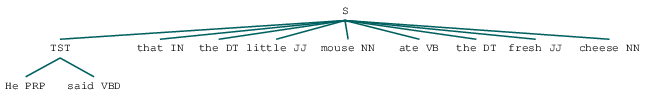

In [140]:
grammar_tst = r"TST: {<PRP><VB|VBD>?}"
chunk_parser = regex_parser(grammar_tst)
chunk_result = chunk_parser.parse(sent_tokens)
chunk_result

## Example 2
#### Extracting Noun Phrases from the sentence (chunking)

In [141]:
grammar_np = r"NP: {<DT>?<JJ>*<NN>}" 
chunk_parser = regex_parser(grammar_np)
sent2 = "She is wearing a beautiful dress"
sent_tokens2 = nltk.pos_tag(word_tokenize(sent2))
sent_tokens2

[('She', 'PRP'),
 ('is', 'VBZ'),
 ('wearing', 'VBG'),
 ('a', 'DT'),
 ('beautiful', 'JJ'),
 ('dress', 'NN')]

In [143]:
chunk_result2 = chunk_parser.parse(sent_tokens2) 
print(chunk_result2)

(S She/PRP is/VBZ wearing/VBG (NP a/DT beautiful/JJ dress/NN))


In [144]:
grammar_np = r"NP: {<DT>?<JJ>*<NN>}" 
# sent2 = "The man walked to the bank and asked for water"
sent2 = "she sells sea shells by sea side"
sent_tokens2 = nltk.pos_tag(word_tokenize(sent2))
sent_tokens2

[('she', 'PRP'),
 ('sells', 'VBZ'),
 ('sea', 'NN'),
 ('shells', 'NNS'),
 ('by', 'IN'),
 ('sea', 'NN'),
 ('side', 'NN')]

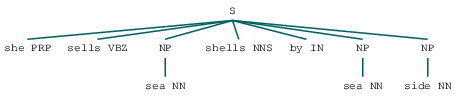

In [145]:
chunk_result2 = chunk_parser.parse(sent_tokens2) 
chunk_result2

## Example 3
#### Extracting Verb Phrases from the sentence (chunking)

In [151]:
grammar_vp = r"MYVP: {<PRP>?<VB|VBD|VBZ|VBG>*<RB|RBR>}"
grammar_vp

'MYVP: {<PRP>?<VB|VBD|VBZ|VBG>*<RB|RBR>}'

In [152]:
chunk_parser2 = nltk.RegexpParser(grammar_vp)

In [148]:
sent3 = "She is walking very quickly to the mall"
# sent3 = "She is not walking to the mall"
# sent3 = "She is not walking quickly to the mall"
sent_tokens3 = nltk.pos_tag(word_tokenize(sent3))
sent_tokens3

[('She', 'PRP'),
 ('is', 'VBZ'),
 ('walking', 'VBG'),
 ('very', 'RB'),
 ('quickly', 'RB'),
 ('to', 'TO'),
 ('the', 'DT'),
 ('mall', 'NN')]

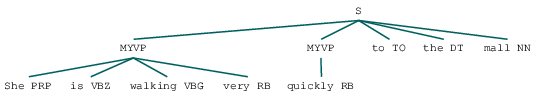

In [153]:
chunk_result2 = chunk_parser2.parse(sent_tokens3) 
chunk_result2

In [154]:
sent3 = "she sells sea shells by sea side"
sent_tokens3 = nltk.pos_tag(word_tokenize(sent3))
sent_tokens3

[('she', 'PRP'),
 ('sells', 'VBZ'),
 ('sea', 'NN'),
 ('shells', 'NNS'),
 ('by', 'IN'),
 ('sea', 'NN'),
 ('side', 'NN')]

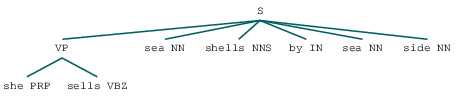

In [155]:
grammar_vp = r"VP: {<PRP><VB|VBD|VBZ|VBG>*<RB|RBR>?}"
chunk_parser3 = nltk.RegexpParser(grammar_vp)
chunk_result3 = chunk_parser3.parse(sent_tokens3) 
chunk_result3

## Example 4

In [156]:
sent4 = "He drives fast on highways"
# sent4 = "He is driving fast on highways"
sent_tokens4 = nltk.pos_tag(word_tokenize(sent4))
sent_tokens4

[('He', 'PRP'),
 ('drives', 'VBZ'),
 ('fast', 'RB'),
 ('on', 'IN'),
 ('highways', 'NNS')]

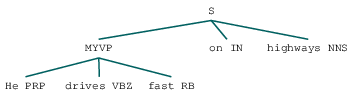

In [157]:
grammar_vp = r"MYVP: {<PRP>?<VB|VBD|VBZ|VBG>*<RB|RBR>}"
chunk_parser2 = nltk.RegexpParser(grammar_vp)
chunk_result4 = chunk_parser2.parse(sent_tokens4) 
chunk_result4

## Example 5

In [158]:
sent5 = "The quick brown fox jumped over the lazy dog"
# sent4 = "He is driving fast on highways"
sent_tokens5 = nltk.pos_tag(word_tokenize(sent5))
sent_tokens5

[('The', 'DT'),
 ('quick', 'JJ'),
 ('brown', 'NN'),
 ('fox', 'NN'),
 ('jumped', 'VBD'),
 ('over', 'IN'),
 ('the', 'DT'),
 ('lazy', 'JJ'),
 ('dog', 'NN')]

In [159]:
grammar_np = r"NP: {<DT>?<JJ>*<NN>}" 

In [160]:
chunk_parser3 = regex_parser(grammar_np)

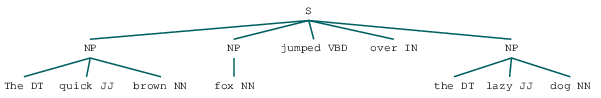

In [161]:
chunk_result5 = chunk_parser3.parse(sent_tokens5) 
chunk_result5

## Example 6 - Multiple chunks
This format permits us to represent more than one chunk type, so long as the chunks do not overlap

In [162]:
sent6 = "The quick brown fox jumped quickly over the lazy dog"
sent_tokens6 = nltk.pos_tag(word_tokenize(sent6))
sent_tokens6

[('The', 'DT'),
 ('quick', 'JJ'),
 ('brown', 'NN'),
 ('fox', 'NN'),
 ('jumped', 'VBD'),
 ('quickly', 'RB'),
 ('over', 'IN'),
 ('the', 'DT'),
 ('lazy', 'JJ'),
 ('dog', 'NN')]

In [163]:
grammar_np = r"""NP: {<DT>?<JJ>*<NN>}
               VP: {<PRP>?<VB|VBD|VBZ|VBG>*<RB|RBR>?}"""

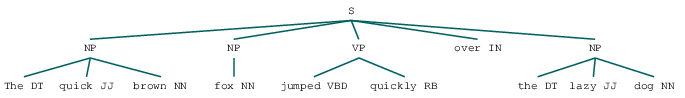

In [164]:
chunk_parser4 = regex_parser(grammar_np)
chunk_result6 = chunk_parser4.parse(sent_tokens6) 
chunk_result6

# Chinking in Python
Excluding a Chink from a Chunk !!!

## Example 1

In [165]:
sent = "She is walking very quickly to the mall"
# sent3 = "She is not walking to the mall"
# sent3 = "She is not walking quickly to the mall"
sent_tokens = nltk.pos_tag(word_tokenize(sent))
sent_tokens

[('She', 'PRP'),
 ('is', 'VBZ'),
 ('walking', 'VBG'),
 ('very', 'RB'),
 ('quickly', 'RB'),
 ('to', 'TO'),
 ('the', 'DT'),
 ('mall', 'NN')]

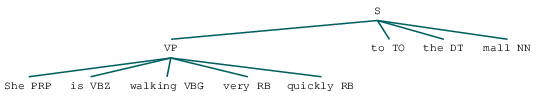

In [166]:
chunk_grammar = r""" 
                    VP : {<PRP>?<VB|VBD|VBZ|VBG>*<RB|RBR>+} #chunk regex sequence
                 """
# above regex will remove adverb from the chunk
# }  { -> reverse curly braces for removalchunk_result2 = chunk_parser.parse(sent_tokens2) 
chunk_parser = regex_parser(chunk_grammar)
chunk_result = chunk_parser.parse(sent_tokens) 
chunk_result

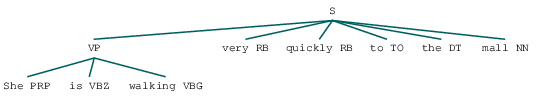

In [167]:
chink_grammar = r""" 
                    VP : {<PRP>?<VB|VBD|VBZ|VBG>*<RB|RBR>+} #chunk regex sequence
                         }<RB>+{ #chink regex sequence - adverb
                 """
# above regex will remove adverb from the chunk
# }  { -> reverse curly braces for removal

chunk_parser = regex_parser(chink_grammar)
chunk_result = chunk_parser.parse(sent_tokens) 
chunk_result

## Example 2

In [168]:
sent = "She is walking very quickly to the mall"
# sent3 = "She is not walking to the mall"
# sent3 = "She is not walking quickly to the mall"
sent_tokens = nltk.pos_tag(word_tokenize(sent))
sent_tokens

[('She', 'PRP'),
 ('is', 'VBZ'),
 ('walking', 'VBG'),
 ('very', 'RB'),
 ('quickly', 'RB'),
 ('to', 'TO'),
 ('the', 'DT'),
 ('mall', 'NN')]

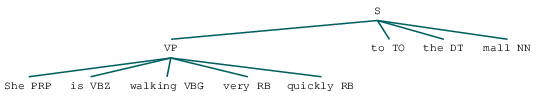

In [169]:
chunk_grammer = r""" 
                    VP : {<PRP>?<VB|VBD|VBZ|VBG>*<RB|RBR>+} #chunk regex sequence
                 """

# above regex will remove verb from the chunk
# }  { -> reverse curly braces for removal
chink_parser = nltk.RegexpParser(chunk_grammer)
chink_parser.parse(sent_tokens)

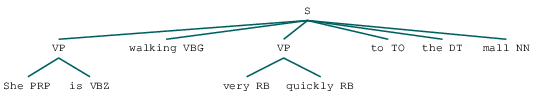

In [171]:
chink_grammar = r""" 
                    VP : {<PRP>?<VB|VBD|VBZ|VBG>*<RB|RBR>+} #chunk regex sequence
                         }<VBG>+{ #chink regex sequence - adverb
                 """

# above regex will remove verb from the chunk
# }  { -> reverse curly braces for removal
chink_parser = nltk.RegexpParser(chink_grammar)
chink_parser.parse(sent_tokens)

# Context Free Grammar

A context-free grammar (CFG) is a set of recursive rewriting rules (or productions) used to generate patterns of strings. Any natural language follows context free grammar. The normal grammar that we have been learning in schools is “Context free grammar” or Type-2 grammar

A CFG consists of the following components:
* a set of terminal symbols (words in natural language)
* a set of nonterminal symbols (NP, VP, NN, VB etc)
* a set of productions (NP ->  DT JJ NN)  - rules for making phrases
* a start symbol (S)

The left side of all productions will always be a non-terminal symbol


In [172]:
# from nltk.parse.generate import generate, demo_grammar
from nltk.parse.generate import generate
from nltk import CFG

In [176]:
my_cfg = """
S -> NP VP 
VP -> V N 
V -> "saw"|"met" 
N -> "dog"|"cat"
NP -> "John"|"Jim"
"""

CFG_grammar = nltk.CFG.fromstring(my_cfg)

In [177]:
myLegalSentences = generate(CFG_grammar)

for sentence in myLegalSentences:
    print(sentence)

['John', 'saw', 'dog']
['John', 'saw', 'cat']
['John', 'met', 'dog']
['John', 'met', 'cat']
['Jim', 'saw', 'dog']
['Jim', 'saw', 'cat']
['Jim', 'met', 'dog']
['Jim', 'met', 'cat']


In [178]:
my_cfg = """
S -> NP VP 
VP -> V N 
V -> "saw"|"met" 
N -> "dog"|"cat"
NP -> "John"|"Jim"|"Ram" 
"""

CFG_grammar = nltk.CFG.fromstring(my_cfg)
myLegalSentences = generate(CFG_grammar)

for sentence in myLegalSentences:
    print(sentence)

['John', 'saw', 'dog']
['John', 'saw', 'cat']
['John', 'met', 'dog']
['John', 'met', 'cat']
['Jim', 'saw', 'dog']
['Jim', 'saw', 'cat']
['Jim', 'met', 'dog']
['Jim', 'met', 'cat']
['Ram', 'saw', 'dog']
['Ram', 'saw', 'cat']
['Ram', 'met', 'dog']
['Ram', 'met', 'cat']


In [179]:
my_cfg = """
S -> NP VP 
VP -> V N 
V -> "saw"|"met" 
N -> "dog"|"cat"
NP -> N PN
PN -> "John"|"Jim" | "Ram"
"""

CFG_grammar = nltk.CFG.fromstring(my_cfg)
myLegalSentences = generate(CFG_grammar)

for sentence in myLegalSentences:
    print(sentence)

['dog', 'John', 'saw', 'dog']
['dog', 'John', 'saw', 'cat']
['dog', 'John', 'met', 'dog']
['dog', 'John', 'met', 'cat']
['dog', 'Jim', 'saw', 'dog']
['dog', 'Jim', 'saw', 'cat']
['dog', 'Jim', 'met', 'dog']
['dog', 'Jim', 'met', 'cat']
['dog', 'Ram', 'saw', 'dog']
['dog', 'Ram', 'saw', 'cat']
['dog', 'Ram', 'met', 'dog']
['dog', 'Ram', 'met', 'cat']
['cat', 'John', 'saw', 'dog']
['cat', 'John', 'saw', 'cat']
['cat', 'John', 'met', 'dog']
['cat', 'John', 'met', 'cat']
['cat', 'Jim', 'saw', 'dog']
['cat', 'Jim', 'saw', 'cat']
['cat', 'Jim', 'met', 'dog']
['cat', 'Jim', 'met', 'cat']
['cat', 'Ram', 'saw', 'dog']
['cat', 'Ram', 'saw', 'cat']
['cat', 'Ram', 'met', 'dog']
['cat', 'Ram', 'met', 'cat']


In [180]:
CFG_grammar = nltk.CFG.fromstring(my_cfg)
myLegalSentences = generate(CFG_grammar)
for sentence in generate(CFG_grammar):
    print(" ".join(sentence))

dog John saw dog
dog John saw cat
dog John met dog
dog John met cat
dog Jim saw dog
dog Jim saw cat
dog Jim met dog
dog Jim met cat
dog Ram saw dog
dog Ram saw cat
dog Ram met dog
dog Ram met cat
cat John saw dog
cat John saw cat
cat John met dog
cat John met cat
cat Jim saw dog
cat Jim saw cat
cat Jim met dog
cat Jim met cat
cat Ram saw dog
cat Ram saw cat
cat Ram met dog
cat Ram met cat


In [118]:
mysentence = ["I","saw","a", "movie"]
print(" ".join(mysentence))

I saw a movie


In [181]:
CFG_grammar.productions()  # gives all the productions (rules)

[S -> NP VP,
 VP -> V N,
 V -> 'saw',
 V -> 'met',
 N -> 'dog',
 N -> 'cat',
 NP -> N PN,
 PN -> 'John',
 PN -> 'Jim',
 PN -> 'Ram']

## Automating Text Paraphrasing In Python


In [182]:
# [('John', 'NNP'),
#  ('is', 'VBZ'),
#  ('walking', 'VBG'),
#  ('very', 'RB'),
#  ('quickly', 'RB'),
#  ('to', 'TO'),
#  ('the', 'DT'),
#  ('mall', 'NN')]

def cfg_parse(sentence):
    sent_tk = nltk.pos_tag(word_tokenize(sentence)) # sent_tk will be a list of tuples returned by nltk.pos_tag
    for postag in sent_tk:
        if postag[1] == 'NNP':
            s_NP = "\'" + postag[0] + "\'"  # will create a string like 'John'  -- proper noun in single quotes
        if postag[1] == 'VBD' or postag[1]=='VBN':
            s_V = "\'" + postag[0] + "\'"   # will create a string like 'saw'   -- verb in single quotes
        if postag[1] == 'NN':
            s_N = "\'" + postag[0] + "\'"   # will create a string like 'dog'   -- noun in single quotes
        if postag[1] == 'DT':
            s_DT = "\'" + postag[0] + "\'"   # will create a string like 'a'   -- noun in single quotes
        else: pass
    cfg_grammar2 = nltk.CFG.fromstring("""
    S -> NP VP
    VP -> V DT N
    NP -> {}
    V -> {}
    N -> {}
    DT -> {}
    """.format(s_NP,s_V,s_N,s_DT))
    for sentence in generate(cfg_grammar2): 
        print(" ".join(sentence)) 
    return 

In [183]:
#example 1
cfg_parse("John saw a long white boat")
# using CFG we can generate the "cream" of the sentence

John saw a boat


In [184]:
#example 2
cfg_parse("John saw a cat")

John saw a cat


In [185]:
#example 3
cfg_parse("A cat was seen by John")

John seen A cat


In [187]:
#example 4
cfg_parse("A Cat was seen by john")

Cat seen A john


This is wrong!

In [126]:
nltk.pos_tag(word_tokenize("A Cat was seen by john"))

[('A', 'DT'),
 ('Cat', 'NNP'),
 ('was', 'VBD'),
 ('seen', 'VBN'),
 ('by', 'IN'),
 ('john', 'NN')]

In [188]:
x = 100
y = 50
z = x+y
print("The value of x ={} , and y = {} , and their sum = {}".format(x,y,z))

The value of x =100 , and y = 50 , and their sum = 150


Text(0.5, 1.0, 'The Title of plot : 150 ')

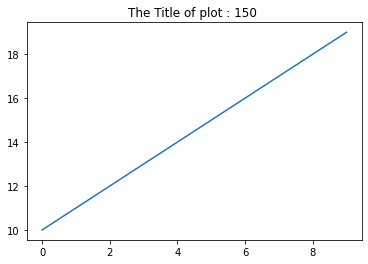

In [189]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(10)
y = np.arange(10,20)
plt.plot(x,y)
plt.title("The Title of plot : {} ".format(z))

In [197]:
x = 100
y = 50
z = x+y
print("The value of x ={} , and x = {} , and their sum = {}".format(x,y,z))

The value of x =100 , and x = 50 , and their sum = 150


Because cat with upper case ‘C’ is a proper noun and John with a lower case ‘j’ is a common noun and with respect to our CFG rule proper noun should come first. Therefore, when working with CFG’s and complicated sentences other complex parsers are used